import packages and self written classes and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from neural_network import *
from optimizers import *
from mnist_functions import *
import sys

import warnings
warnings.filterwarnings("ignore")

Load and preprocess data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data
y = mnist.target

#one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# 4. Fit and transform the labels
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
# Scaling
X = X/255.0

output_size = 10
# train test split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_onehot, test_size=10000, random_state=42
)

# Split train+val into train (50k) and validation (10k)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=10000, random_state=42
)

Tune learning rate and regularization parameter simultaneously

On the x axis are the different regularization parameters and on the y axis are different learning rates


time
           0.000100   0.001778   0.031623   0.562341    10.000000
0.000100   98.785851  89.146888  89.405745  89.596186   87.800688
0.001778   94.005572  95.072538  90.429134  90.360954   93.837476
0.031623   96.116859  95.417851  94.866490  94.802009   93.091443
0.562341   99.346485  93.405433  92.642382  92.072353  107.908481
10.000000  99.839924  90.848382  87.759792  93.035610   91.814403
result
           0.000100   0.001778   0.031623   0.562341   10.000000
0.000100      0.7071     0.7000     0.7141     0.6478     0.2640
0.001778      0.9159     0.9170     0.9447     0.9658     0.3950
0.031623      0.9681     0.9714     0.9759     0.9519     0.4062
0.562341      0.0988     0.0988     0.1158     0.1007     0.0885
10.000000     0.0997     0.0997     0.0997     0.0997     0.0966


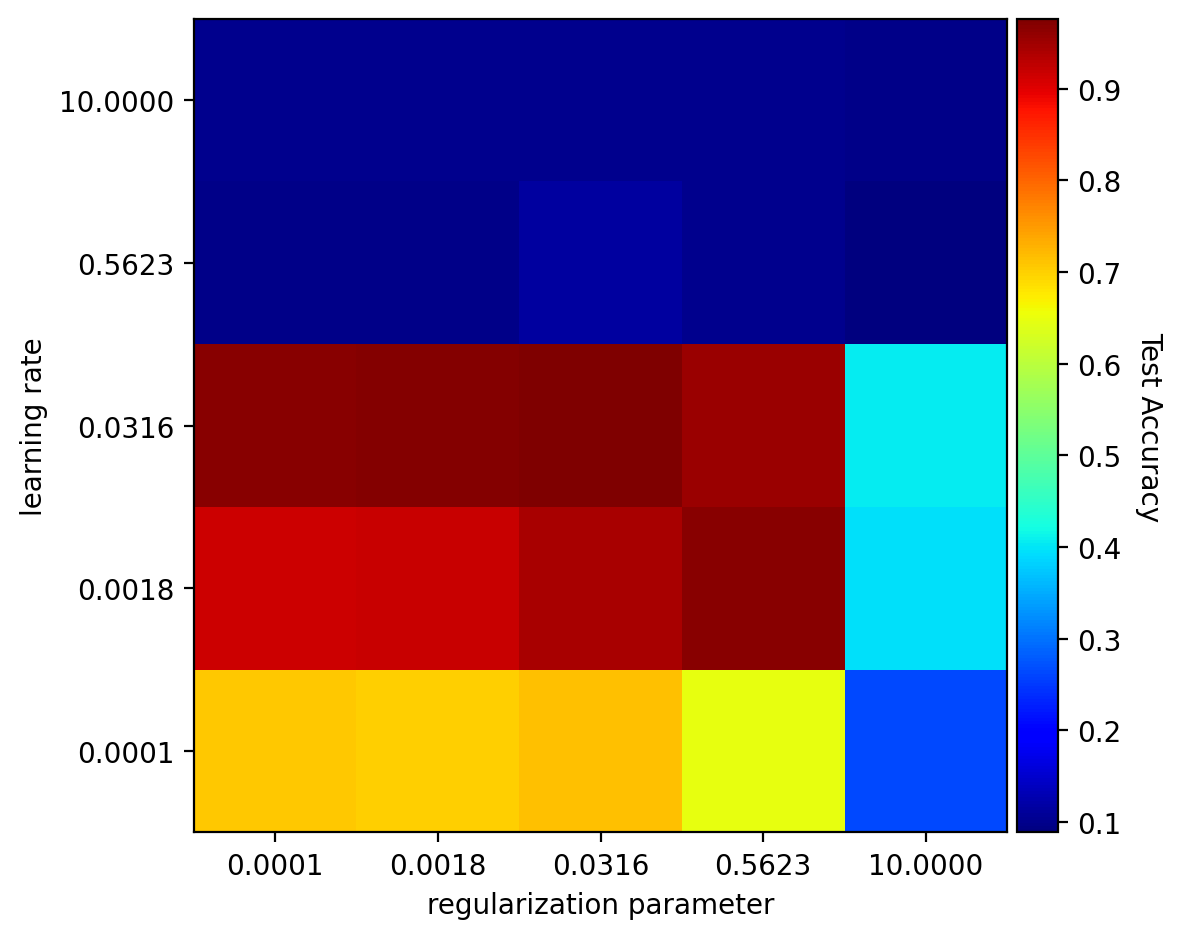

,0.000100,0.001778,0.031623,0.562341,10.000000
0.000100,0.7071,0.7000,0.7141,0.6478,0.2640
0.001778,0.9159,0.9170,0.9447,0.9658,0.3950
0.031623,0.9681,0.9714,0.9759,0.9519,0.4062
0.562341,0.0988,0.0988,0.1158,0.1007,0.0885
10.000000,0.0997,0.0997,0.0997,0.0997,0.0966


In [3]:
np.random.seed(472)
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
list_lambda = np.logspace(-4,1,5)
list_learning_rates = np.logspace(-4,1,5) 
epochs = 100 #Lars 100
tune_learning_rate_reg(X_train, y_train, X_val, y_val, layer_output_sizes, activation_funcs, list_learning_rates, list_lambda, epochs=epochs)

Compare different activation functions

On the x axis are different regularization parameters and on the y axis the different models

model 1: ReLU, sigmoid, sigmoid

model 2: ReLU, sigmoid, ReLU

model 3: sigmoid, sigmoid, sigmoid


In [4]:
np.random.seed(209)
layer_output_sizes = [128, 64, 32, output_size]
list_activation_funcs = [[ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, ReLU, softmax], [sigmoid, sigmoid, sigmoid, softmax]]
list_model_numbers = [1,2,3]
list_regularization = np.logspace(-4,1,5)
epochs = 100 #Lars 100
compare_activation_reg(X_train, y_train, X_val, y_val, layer_output_sizes, list_activation_funcs, list_model_numbers, list_regularization, epochs)

--------------------------------------------------
times:
    0.000100    0.001778    0.031623    0.562341    10.000000
1   89.967223   91.438525  102.521687  107.882624  106.668810
2  107.826593  109.761743  107.104422  105.089756  104.422661
3  139.531512  140.983080  140.370431  138.318826  139.071376
accuraccy
   0.000100   0.001778   0.031623   0.562341   10.000000
1     0.9657     0.9730     0.9712     0.9505     0.3051
2     0.9611     0.9655     0.9740     0.9580     0.8022
3     0.9642     0.9748     0.9632     0.9203     0.1158
--------------------------------------------------
accuraccy of best learning rate
1    0.9730
2    0.9740
3    0.9748
dtype: float64


,0.000100,0.001778,0.031623,0.562341,10.000000
1,0.9657,0.9730,0.9712,0.9505,0.3051
2,0.9611,0.9655,0.9740,0.9580,0.8022
3,0.9642,0.9748,0.9632,0.9203,0.1158


Plot errors per epoch

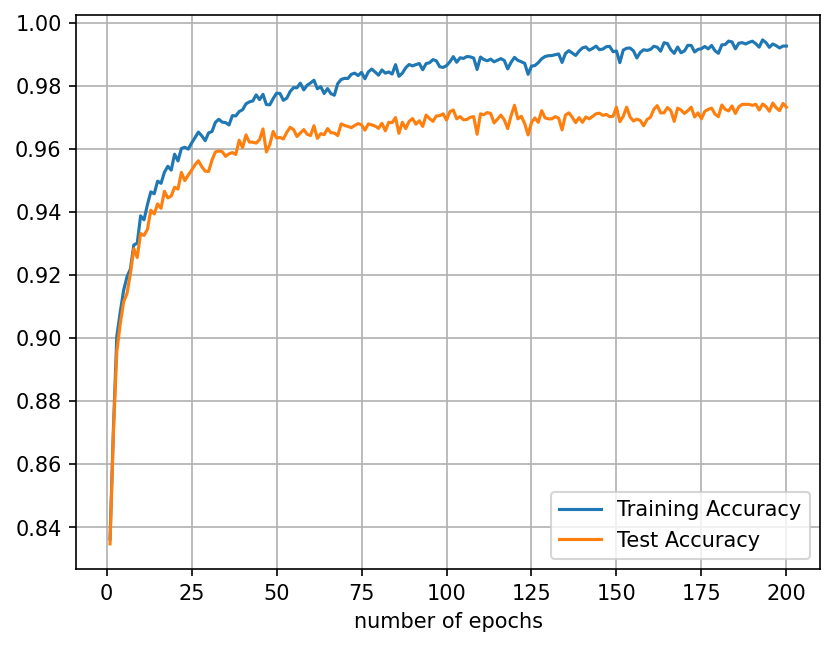

In [5]:
np.random.seed(120)
layer_output_sizes = [128, 64, output_size]
activation_funcs = [ReLU, sigmoid, softmax]
lmbda = 0
epochs= 200 #Lars 200
compute_errors_per_epoch(X_train, y_train, X_val, y_val, layer_output_sizes, activation_funcs, lmbda, epochs)

Compare the number of hidden layers while using regularization

On the x axis are different regularization parameters and on the y axis the different models

model 1: 1 hidden layer

model 2: 2 hidden layer

model 3: 3 hidden layer

model 4: 4 hidden layer


In [6]:
np.random.seed(123)
list_layer_output_sizes = [[128, output_size], [128, 64, output_size], [128, 64, 32, output_size], [128, 64, 32, 16, output_size]]   # define number of nodes in layers
list_activation_funcs = [[ReLU, softmax], [ReLU, sigmoid, softmax], [ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, sigmoid, sigmoid, softmax]]    # activation functions
number_hidden_layers =[1,2,3,4]
list_regularization = np.logspace(-4,1,7)
list_regularization = np.insert(list_regularization,0,0)
epochs=100 #Lars 100
results_hidden_layer_reg = tune_hidden_layers_reg(X_train, y_train, X_val, y_val, list_layer_output_sizes, list_activation_funcs, number_hidden_layers, list_regularization, epochs=epochs)

--------------------------------------------------
times:
    0.000000    0.000100    0.000681    0.004642    0.031623    0.215443   \
1   66.016034   65.529593   66.193735   65.842576   67.555417   66.713897   
2   91.289076   94.013535   92.279349   90.754527   90.769401   91.951582   
3  105.070787  107.164413  107.507673  106.204934  105.107338  106.483393   
4  111.348055  114.438251  113.220616  111.949812  111.562275  111.275736   

    1.467799    10.000000  
1   66.504898   66.462906  
2   92.238781   92.579374  
3  104.675166  109.177149  
4  110.915581  112.043732  
accuraccy
   0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
1     0.9643     0.9642     0.9642     0.9706     0.9732     0.9693   
2     0.9677     0.9704     0.9694     0.9742     0.9761     0.9647   
3     0.9691     0.9674     0.9695     0.9725     0.9766     0.9659   
4     0.9614     0.9671     0.9667     0.9719     0.9730     0.9639   

   1.467799   10.000000  
1     0.9410     0.8856 

Compare number of nodes while using regularization

On the x axis are different regularization parameters and on the y axis the different models

model 512: 512 and 256 nodes

model 256: 256 and 128 nodes

model 128: 128 and 64 nodes

model 64: 64 and 32 nodes


In [7]:
np.random.seed(123)
list_layer_output_sizes = [[512, 256, output_size], [256, 128, output_size], [128, 64, output_size], [64, 32, output_size], [32, 16, output_size]]   # define number of nodes in layers
activation_funcs = [ReLU, sigmoid, softmax]
list_highest_size=[512, 256, 128, 64, 32]
list_regularization = np.logspace(-4,1,7)
list_regularization = np.insert(list_regularization,0,0)
epochs = 100 #Lars 100
results_nodes_reg = tune_number_nodes_reg(X_train, y_train, X_val, y_val, list_layer_output_sizes, activation_funcs, list_highest_size, list_regularization, epochs=epochs)

--------------------------------------------------
times:
      0.000000    0.000100    0.000681    0.004642    0.031623    0.215443   \
512  600.835509  567.383902  535.640320  513.793705  505.843674  507.228139   
256  244.376095  237.910632  230.580854  224.926585  225.613324  225.154437   
128   90.057496   91.895120   93.017567   91.532001   89.532131   91.245446   
64    57.569820   56.516984   56.651922   56.670398   56.782160   56.871445   
32    39.619218   39.901455   40.570607   40.160630   41.309685   40.439299   

      1.467799    10.000000  
512  508.424179  521.560285  
256  223.446745  232.297116  
128   90.127503   90.011003  
64    56.959125   56.761054  
32    40.835736   40.422547  
accuraccy
     0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
512     0.9644     0.9658     0.9701     0.9752     0.9768     0.9688   
256     0.9680     0.9681     0.9685     0.9776     0.9761     0.9685   
128     0.9630     0.9709     0.9706     0.9757     0.9780

Compare the best models so far

model 1: 256 128 64

model 2: 128 64 32

model 3: 256 128


In [8]:
np.random.seed(213)
list_numbers = [1,2,3]
list_regularization = np.logspace(-3,-1, 7)
list_layer_output_sizes = [[256, 128, 64, output_size], [128, 64, 32, output_size],[256, 128, output_size]]
list_activation_funcs = [[ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, softmax]]
epochs = 100 #Lars 100
compare_best_models(X_train, y_train, X_test, y_test, list_layer_output_sizes, list_activation_funcs, list_numbers, list_regularization, epochs)


--------------------------------------------------
times:
     0.001000    0.002154    0.004642    0.010000    0.021544    0.046416  \
1  256.522763  253.806497  251.916851  250.392301  253.260801  252.227117   
2  103.174639  104.065847  103.556343  102.467872  104.084484  105.451562   
3  234.038764  231.709342  223.253192  222.302654  223.637833  222.967827   

     0.100000  
1  252.344052  
2  103.288954  
3  222.224119  
accuraccy
   0.001000  0.002154  0.004642  0.010000  0.021544  0.046416  0.100000
1    0.9668    0.9700    0.9713    0.9741    0.9697    0.9701    0.9695
2    0.9649    0.9705    0.9701    0.9702    0.9746    0.9715    0.9697
3    0.9660    0.9719    0.9730    0.9754    0.9736    0.9727    0.9699
--------------------------------------------------
accuraccy of best learning rate
1    0.9741
2    0.9746
3    0.9754
dtype: float64


Train and evaluate the best model

accuraccy 0.9695


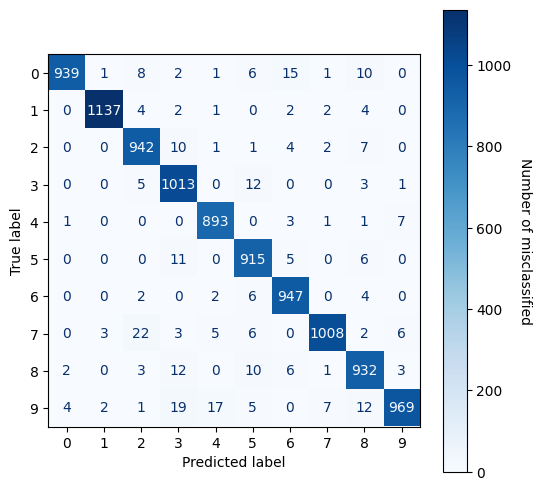

In [9]:
np.random.seed(329)
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
lmbda = 0.021544
epochs = 100 #Lars 100
train_and_evaluate_best_model(X_trainval, y_trainval, X_test, y_test, layer_output_sizes, activation_funcs, lmbda, epochs)